# Time Series Decomposition using Python

It's always good to check if the time series data is stationary or not. If its imposible to detect by naked eye, try using tests like ADF or KPSS. This is important as the time series data must be stationary(performs better if stationary) for forecasting! If it's not, try to make it stationary!
  
After using the KPSS or ADF test, if the data is non-stationary, try to decompose it(remove trends) using multiplicative model. If stationary, decompose it using the additive model.
  
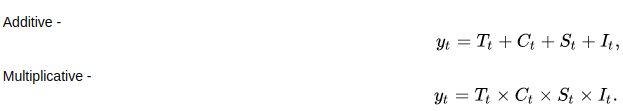

Here, T = trend, C = cyclic, S = seasonality and I = residue
  
This concept is explained by the below example. Data chosen is the Amazon revenue over the years. Let's try to apply the decomposition technique and try to make the series stationary!

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

The dateset consists of 3 columns namely [Quarter,Revenue,Net Income]. Lets convert the Quarter into date format from the object format using parser.

In [2]:
def convert_datetime(x):
    return datetime.strptime(x, '%m/%d/%Y')

In [3]:
data = pd.read_csv('amazon_revenue_profit.csv', parse_dates = ['Quarter'], date_parser = convert_datetime)

In [4]:
data.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
# Basic Analysis
print('Dataset has\n')
print('Rows: {}'.format(data.shape[0]))
print('Columns: {}'.format(data.shape[1]))
print('\nFeatures:\n{}'.format(data.columns.tolist()))
print('\nMissing values:\n{}'.format(data.isna().any()))

Dataset has

Rows: 61
Columns: 3

Features:
['Quarter', 'Revenue', 'Net Income']

Missing values:
Quarter       False
Revenue       False
Net Income    False
dtype: bool


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


### Check if the time series data is stationary?
Here, I will be using KPSS test to check if the data is stationary! Null hypothesis - data is stationary, Alternate hypothesis - data is not stationary.

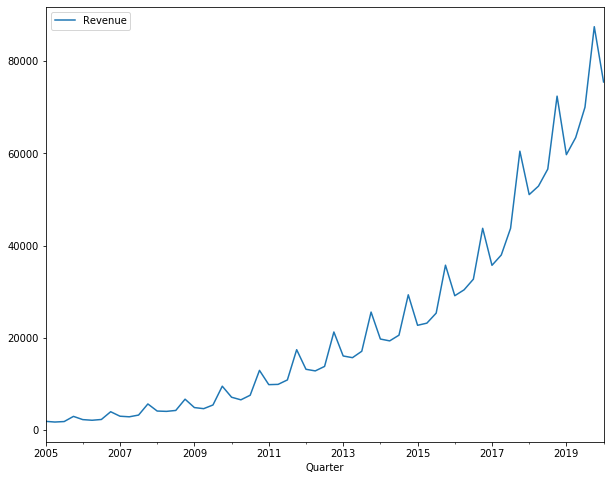

In [7]:
data.plot(x='Quarter', y='Revenue')

###### Insight:
    From this plot, the data has an increasing trend along with seasonality!

In [8]:
from statsmodels.tsa.stattools import kpss

In [9]:
values = kpss(data['Revenue'], 'ct') #* 'c' : The data is stationary around a constant (default).
                                #* 'ct' : The data is stationary around a trend.

/home/supriya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [10]:
values

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

KPSS test returns the following values:  
  
kpss_stat : float, The KPSS test statistic.  
p_value : float, The p-value of the test. The p-value is interpolated from Table 1 in Kwiatkowski et al. (1992), and a boundary point is returned if the test statistic is outside the table of critical values, that is, if the p-value is outside the interval (0.01, 0.1).  
lags : int, The truncation lag parameter.  
crit : dict, The critical values at 10%, 5%, 2.5% and 1%. Based on Kwiatkowski et al. (1992).  

###### Insight:
    Here the the test statistic is less then the critical value at 2.5%. Also assuming the p threshold to be at 0.05, p value obatined is also less. Thus, NULL hypothesis is rejected! Hence the data is non-stationary!

### Decomposition
Let's make use of multiplicative decomposition to remove the trend and make the time series stationary!

In [11]:
import statsmodels.api as sm

In [13]:
res = sm.tsa.seasonal_decompose(data['Revenue'], model = 'multiplicative')# Seasonal decomposition using moving averages.

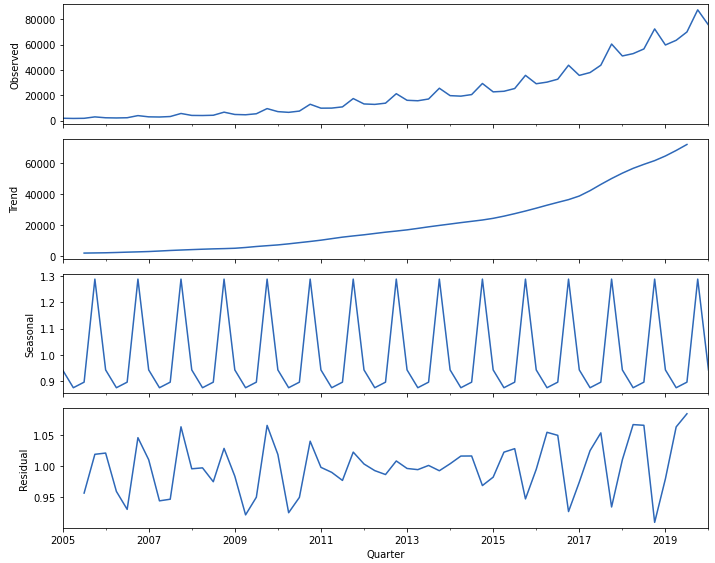

###### Insight:
    Here the time series gets splitted into trends, seasonality and residual(noise). Since a multiplicative model is used, let's check if the observed values and the multiple of (T,S,I) satisfies the equation!

In [14]:
res.observed[4]

59700.0

In [15]:
#This should be equal to trend[4]*seasonality[4]*residue[4]
res.trend[4]*res.seasonal[4]*res.resid[4]

59700.0

Since a multiplicative model is used, lets remove the trend from the time series using a division!

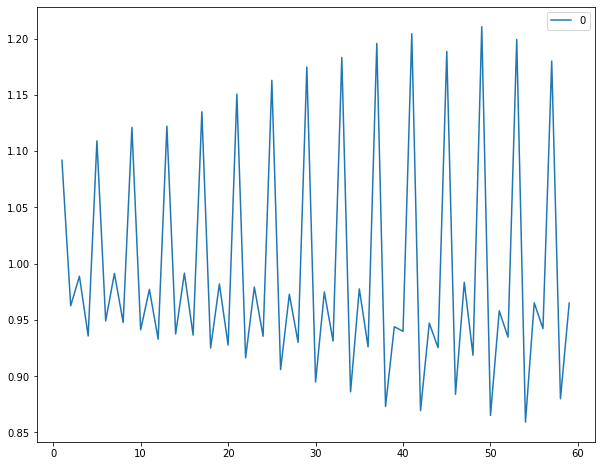

In [16]:
pd.DataFrame(res.observed/res.trend).plot()

#### Time series data is seasonal and stationary!